In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
pip install pygwalker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 842.5/842.5 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 101.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pygwalker as pyg

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv(r"/kaggle/input/rossmann-stores-data/Rossmann Stores Data.csv")

/tmp/ipykernel_31/4224365133.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"/kaggle/input/rossmann-stores-data/Rossmann Stores Data.csv")


In [6]:
# walker = pyg.walk(df, spec="/kaggle/working/")
walker = pyg.walk(df, spec="ksf://<kaggle>/<working>/<file>")

Box(children=(HTML(value='\n<div id="ifr-pyg-00063475dd5f9864ivrzCUwWZRMAQyO0" style="height: auto">\n    <hea…

**Explore Data shape and manipulate it**

In [7]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## **EDA**

In [29]:
df.shape

(1017209, 9)

In [30]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [32]:
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [33]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

## What is Biggeest amount of sales?

In [34]:
df['Sales'].max()

41551

## What is year of this Amount?

In [35]:
Date = df.loc[df['Sales'] == 41551, 'Date']

## Show Date of This Amount

In [36]:
Date

44393    2015-06-22
Name: Date, dtype: object

## Show Dates of Minimum Days for stores

In [37]:
#minmum Day 
df['Sales'].min()

0

In [38]:
min_Date = df.loc[df['Sales'] == 0, 'Date']

In [39]:
min_Date

291        2015-07-31
875        2015-07-31
1406       2015-07-30
1990       2015-07-30
2521       2015-07-29
              ...    
1017204    2013-01-01
1017205    2013-01-01
1017206    2013-01-01
1017207    2013-01-01
1017208    2013-01-01
Name: Date, Length: 172871, dtype: object

## What is the most amount of sum store Make sales?
## What is the min amount of sum Store Make sales?

In [40]:
max_sales = df.groupby('Store')['Sales'].sum().max()

In [41]:
max_sales

19516842

In [42]:
min_sales = df.groupby('Store')['Sales'].sum().min()


In [43]:
min_sales

2114322

## **What is the The ID of the most amount Saled By Stores Branch**

In [44]:
import pandas as pd

# Example: Select a specific year (e.g., 2023)
year = 2013

# Convert "Date" column to datetime, handling mixed formats
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

# Filter data for the given year
df_year = df[df['Date'].dt.year == year]

# Group by "Store Id" and sum "Sales"
store_sales = df_year.groupby("Store")["Sales"].sum()

# Get the Store ID with the highest sales
max_store_id = store_sales.idxmax()
max_sales_amount = store_sales.max()

print(f"Store ID with the highest sales in {year}: {max_store_id} (${max_sales_amount})")


Store ID with the highest sales in 2013: 262 ($7564632)


##  What is the Numper of Customer sales amount per spacific Year and Have Promo?

In [45]:
import pandas as pd

# Example: Select a specific year (e.g., 2023)
year = 2015

# Convert "Date" column to datetime, handling mixed formats
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

# Filter data for the given year and where Promo is applied (assuming 'Promo' column exists)
df_filtered = df[(df['Date'].dt.year == year) & (df['Promo'] == 1)]  # Assuming 1 means Promo is applied

# Group by "Customer Id" and sum "Sales"
customer_sales = df_filtered.groupby("Customers")["Sales"].sum()

# Get the Customer ID with the highest sales
if not customer_sales.empty:  # Ensure there is at least one matching record
    max_customer_id = customer_sales.idxmax()
    max_sales_amount = customer_sales.max()
    print(f"Customer Numper with the highest sales in {year} (with promo): {max_customer_id} (${max_sales_amount})")
else:
    print(f"No sales with promo found in {year}.")


Customer Numper with the highest sales in 2015 (with promo): 700 ($2115170)


## What is the Numper of most Customer and most Purchase Amount

In [46]:
import pandas as pd

# Example: Select a specific year (e.g., 2015)
year = 2015

# Convert "Date" column to datetime, handling mixed formats
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

# Filter data for the given year
df_year = df[df['Date'].dt.year == year]

# Group by "Customer Id" and sum "Sales"
customer_sales = df_year.groupby("Customers")["Sales"].sum()

# Get the Customer ID with the highest sales
max_customer_id = customer_sales.idxmax()
max_sales_amount = customer_sales.max()

print(f"Customer Numper with the highest sales in {year}: {max_customer_id} (${max_sales_amount})")


Customer Numper with the highest sales in 2015: 603 ($3687083)


## what is the most Day of week saled amount on from 1:7 

In [47]:
import pandas as pd

# Convert "Date" column to datetime, handling mixed formats
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

# Extract day of the week (Monday=1, Sunday=7)
df['DayOfWeek'] = df['Date'].dt.weekday + 1  # Adjust to match 1=Monday, 7=Sunday

# Filter only days in range 1-7
df_filtered = df[df['DayOfWeek'].between(1, 7)]

# Group by "DayOfWeek" and sum "Sales"
day_sales = df_filtered.groupby("DayOfWeek")["Sales"].sum()

# Get the Day with the highest sales
max_day = day_sales.idxmax()
max_sales_amount = day_sales.max()

print(f"Most sales occurred on Day {max_day} with total sales of ${max_sales_amount}")


Most sales occurred on Day 1 with total sales of $1130203012


## what is the most Day of week saled amount on from 1:7 At spacific years

In [48]:
import pandas as pd

# Example: Select a specific year (e.g., 2023)
year = 2013

# Convert "Date" column to datetime, handling mixed formats
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

# Extract the year and day of the week (Monday=1, Sunday=7)
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.weekday + 1  # Adjust to match 1=Monday, 7=Sunday

# Filter data for the given year and only days in range 1-7
df_filtered = df[(df['Year'] == year) & (df['DayOfWeek'].between(1, 7))]

# Group by "DayOfWeek" and sum "Sales"
day_sales = df_filtered.groupby("DayOfWeek")["Sales"].sum()

# Get the Day with the highest sales
if not day_sales.empty:
    max_day = day_sales.idxmax()
    max_sales_amount = day_sales.max()
    print(f"Most sales occurred on Day {max_day} in {year} with total sales of ${max_sales_amount}")
else:
    print(f"No sales data available for {year}.")


Most sales occurred on Day 1 in 2013 with total sales of $448805308


## **Plot The Data**
* ### Bar Plot which is most days the sales will be high than another school holiday or state holiday
* ### Bar Plot to show sales with Promo or Not


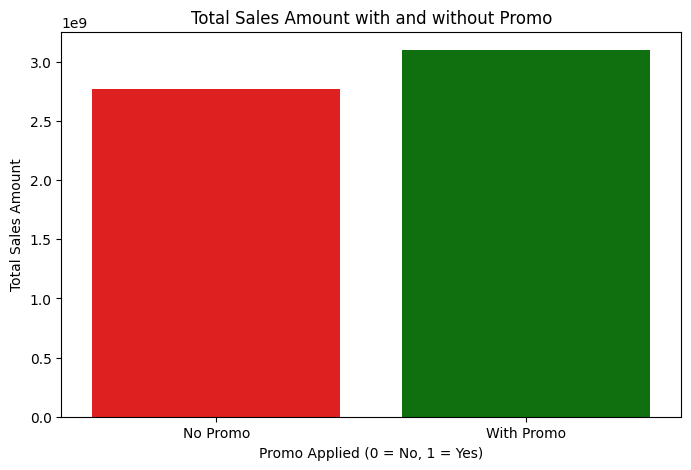

In [49]:
# Convert "Date" column to datetime, handling mixed formats
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

# Group by Promo (0 = No Promo, 1 = Promo) and sum "Sales"
promo_sales = df.groupby("Promo")["Sales"].sum()

# Plot Bar Chart
plt.figure(figsize=(8,5))
sns.barplot(x=promo_sales.index, y=promo_sales.values, palette=["red", "green"])

# Labels and Title
plt.xlabel("Promo Applied (0 = No, 1 = Yes)")
plt.ylabel("Total Sales Amount")
plt.title("Total Sales Amount with and without Promo")
plt.xticks([0, 1], ["No Promo", "With Promo"])

# Show the chart
plt.show()

## Sales againest Days of Week

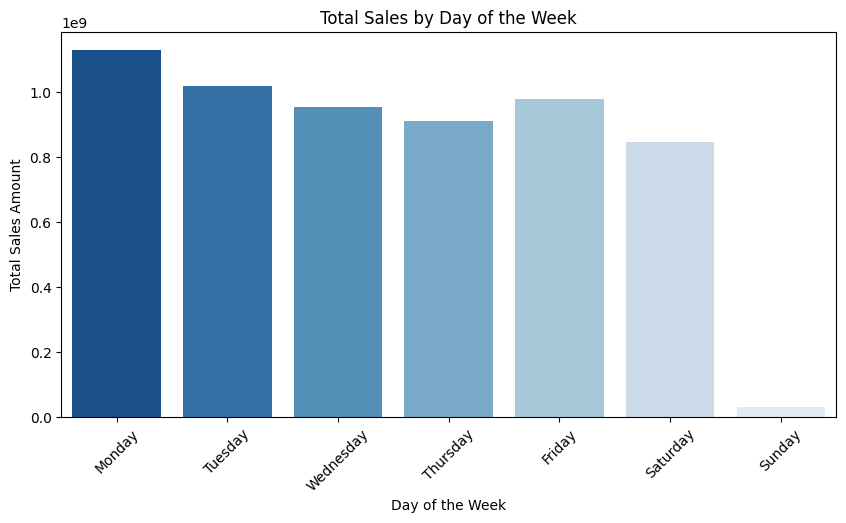

In [50]:
# Convert "Date" column to datetime, handling mixed formats
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

# Extract Day of the Week (Monday=0, Sunday=6)
df['DayOfWeek'] = df['Date'].dt.dayofweek  

# Map numbers to weekday names
days_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['DayOfWeek'] = df['DayOfWeek'].map(days_map)

# Group by Day of Week and sum sales
day_sales = df.groupby("DayOfWeek")["Sales"].sum()

# Sort by actual week order
day_sales = day_sales.reindex(days_map.values())

# Plot Bar Chart
plt.figure(figsize=(10,5))
sns.barplot(x=day_sales.index, y=day_sales.values, palette="Blues_r")

# Labels and Title
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales Amount")
plt.title("Total Sales by Day of the Week")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the chart
plt.show()

## Schools holidays and Sales

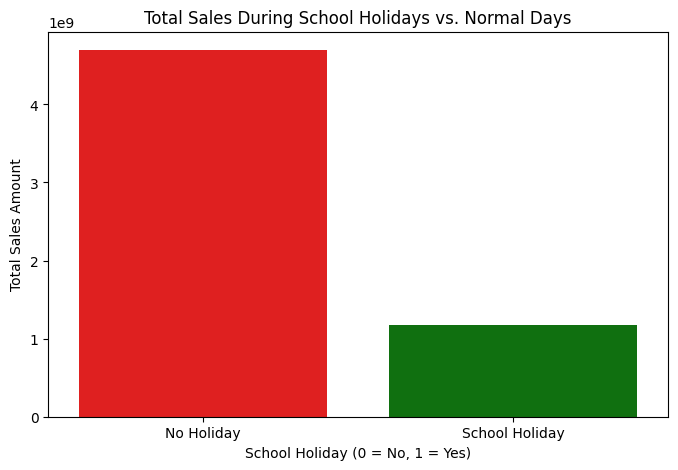

In [51]:
# Convert "Date" column to datetime, handling mixed formats
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

# Group by "SchoolHoliday" (1 = Holiday, 0 = No Holiday) and sum "Sales"
holiday_sales = df.groupby("SchoolHoliday")["Sales"].sum()

# Plot Bar Chart
plt.figure(figsize=(8,5))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette=["red", "green"])

# Labels and Title
plt.xlabel("School Holiday (0 = No, 1 = Yes)")
plt.ylabel("Total Sales Amount")
plt.title("Total Sales During School Holidays vs. Normal Days")
plt.xticks([0, 1], ["No Holiday", "School Holiday"])

# Show the chart
plt.show()


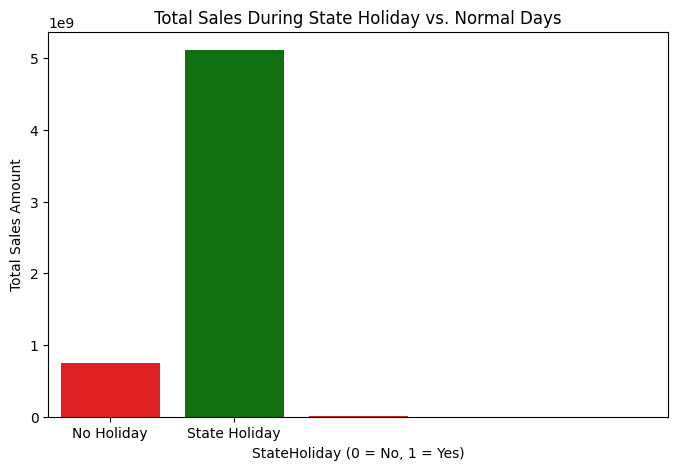

In [52]:
# Convert "Date" column to datetime, handling mixed formats
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

# Group by "SchoolHoliday" (1 = Holiday, 0 = No Holiday) and sum "Sales"
holiday_sales = df.groupby("StateHoliday")["Sales"].sum()

# Plot Bar Chart
plt.figure(figsize=(8,5))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette=["red", "green"])

# Labels and Title
plt.xlabel("StateHoliday (0 = No, 1 = Yes)")
plt.ylabel("Total Sales Amount")
plt.title("Total Sales During State Holiday vs. Normal Days")
plt.xticks([0, 1], ["No Holiday", "State Holiday"])

# Show the chart
plt.show()


## Drawing Time Seris differncing Yearly between Date and Sales At Spacifc Years

# **Modling**
## I will Use model from google Reshearch From hugging Face

# **Install model**

In [53]:
pip install timesfm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import timesfm

# For PyTorch
tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="cpu",
          per_core_batch_size=32,
          horizon_len=128,
          input_patch_len=32,
          output_patch_len=128,
          num_layers=50,
          model_dims=1280,
          use_positional_embedding=False,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
  )


## Prepare Data tp pass it to model and Crop it

In [ ]:
Dropped = ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
new_df = df.drop(Dropped, axis=1)


In [ ]:
new_df

## Make renaming To Prepare our Data Frame to model

In [ ]:
new_df = new_df.rename(columns={"Date": "ds"})

In [ ]:
new_df

## Adding ID With Time Frame Ti

In [ ]:
new_df = new_df.reset_index(drop=True)  # Reset index to start from 0
new_df["unique_id"] = ["T" + str(i + 1) for i in range(len(new_df))]

# Display the updated DataFrame
new_df.head()


## Creating Group wise Time Step

In [ ]:
# Sort values to ensure consistent ordering
new_df = new_df.sort_values(by=["ds"]).reset_index(drop=True)

# Create group-wise counters that reset per date
new_df["unique_id"] = new_df.groupby("ds").cumcount() + 1

# Convert the counter to T1, T2, ...
new_df["unique_id"] = new_df["unique_id"].apply(lambda x: f"T{x}")


In [ ]:
new_df

## to use this model from google The data Frame must have 3 column `ds unique_id Sales(y)` 

In [ ]:
new_df

In [ ]:
import pandas as pd

# Convert 'ds' to datetime format (assuming format is DD/MM/YYYY)
new_df['ds'] = pd.to_datetime(new_df['ds'])

# Confirm conversion
print(new_df.info())  # Should now show 'ds' as datetime64[ns]
print(new_df.head())  # Check the first few rows


In [ ]:
# Sort by date and unique_id (optional but good practice)
new_df = new_df.sort_values(by=['ds', 'unique_id']).reset_index(drop=True)

In [ ]:
new_df

## now,we can easyily filter dataframe

In [ ]:
store4=new_df[new_df['unique_id'] == 'T4']


In [ ]:
store4

## Filter Each Store with ID to make forecst to each Store uniquely

## Start Train model

In [ ]:
forecast_df = tfm.forecast_on_df(
    inputs=store4,
    freq="D",  # Daily
    value_name="Sales",
    num_jobs=-1,
)

In [ ]:
forecast_df.shape

In [ ]:
forecast_df

In [ ]:
!pip install scikit-learn

## Tseting model in `store 4 as Example`

In [ ]:
Train_df=store4[0:500]

In [ ]:
Test_df=store4[500:]

In [ ]:
forecast_df_Test = tfm.forecast_on_df(
    inputs=Train_df,
    freq="W",  # Daily
    value_name="Sales",
    num_jobs=-1,
)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
Test=forecast_df_Test['timesfm'][0:len(Test_df)-1]

In [ ]:
# Test
Test_df[0:128]['Sales'].reset_index(drop=True)

In [ ]:
Test

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# MAE
mae = mean_absolute_error(Test, Test_df[0:128]['Sales'])

# RMSE
mse = mean_squared_error(Test, Test_df[0:128]['Sales'])
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


# Try anoter model RNN,LSTMs

## install debndies keras library for deep learning

In [ ]:
pip install numpy pandas matplotlib scikit-learn tensorflow

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
#Copy df
store_df = store4.copy()

In [ ]:
store_df

In [ ]:
store_df = store_df.sort_values("ds")

In [ ]:
# Use only 'Sales' column for univariate forecast
sales_data = store_df["Sales"].values.reshape(-1, 1)

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
scaled_sales = scaler.fit_transform(sales_data)

In [ ]:
# Step 2: Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [ ]:
seq_length = 30  # Use last 30 days to predict the next one
X, y = create_sequences(scaled_sales, seq_length)

In [ ]:
X = X.reshape((X.shape[0], seq_length, 1))

In [ ]:
# Step 3: Build LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Step 4: Train the model
model.fit(X, y, epochs=20, batch_size=32)

In [ ]:
# Step 5: Predict the next day
last_seq = scaled_sales[-seq_length:]
last_seq = last_seq.reshape((1, seq_length, 1))
predicted_scaled = model.predict(last_seq)
predicted_value = scaler.inverse_transform(predicted_scaled)

print(f"Predicted Sales for next day: {predicted_value[0][0]:.2f}")

In [ ]:
train_pred = model.predict(X)
train_pred_rescaled = scaler.inverse_transform(train_pred)
y_rescaled = scaler.inverse_transform(y)

plt.figure(figsize=(12, 6))
plt.plot(y_rescaled, label="Actual Sales")
plt.plot(train_pred_rescaled, label="Predicted Sales")
store_id=4
plt.title(f"Training Prediction vs Actual for Store {store_id}")
plt.legend()
plt.show()


## Try new model Amazon Chrounous Model to Make forecast using `Language model`
### Transformer Based model

### install model

In [ ]:
pip install git+https://github.com/amazon-science/chronos-forecasting.git

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

In [ ]:
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-small",
  device_map="cpu",
  torch_dtype=torch.bfloat16,
)

In [ ]:
#make forecast for store 4 Test
store4['Sales']

In [ ]:
context = torch.tensor(store4['Sales'].values)  # or .to_numpy()
prediction_length = 12
forecast = pipeline.predict(context, prediction_length)

In [ ]:
forecast_index = range(len(df), len(df) + prediction_length)

In [ ]:
forecast_index

In [ ]:
# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(store4['Sales'], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

## Trying model `Arama` --> Auto Reggrresive model 

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

In [8]:
df=df.sort_values("Date").set_index("Date")

In [9]:
df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1
2013-01-01,379,2,0,0,0,0,a,1
2013-01-01,378,2,0,0,0,0,a,1
2013-01-01,377,2,0,0,0,0,a,1
2013-01-01,376,2,0,0,0,0,a,1
...,...,...,...,...,...,...,...,...
2015-07-31,746,5,9082,638,1,1,0,1
2015-07-31,747,5,10708,826,1,1,0,1
2015-07-31,748,5,7481,578,1,1,0,1


In [10]:
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

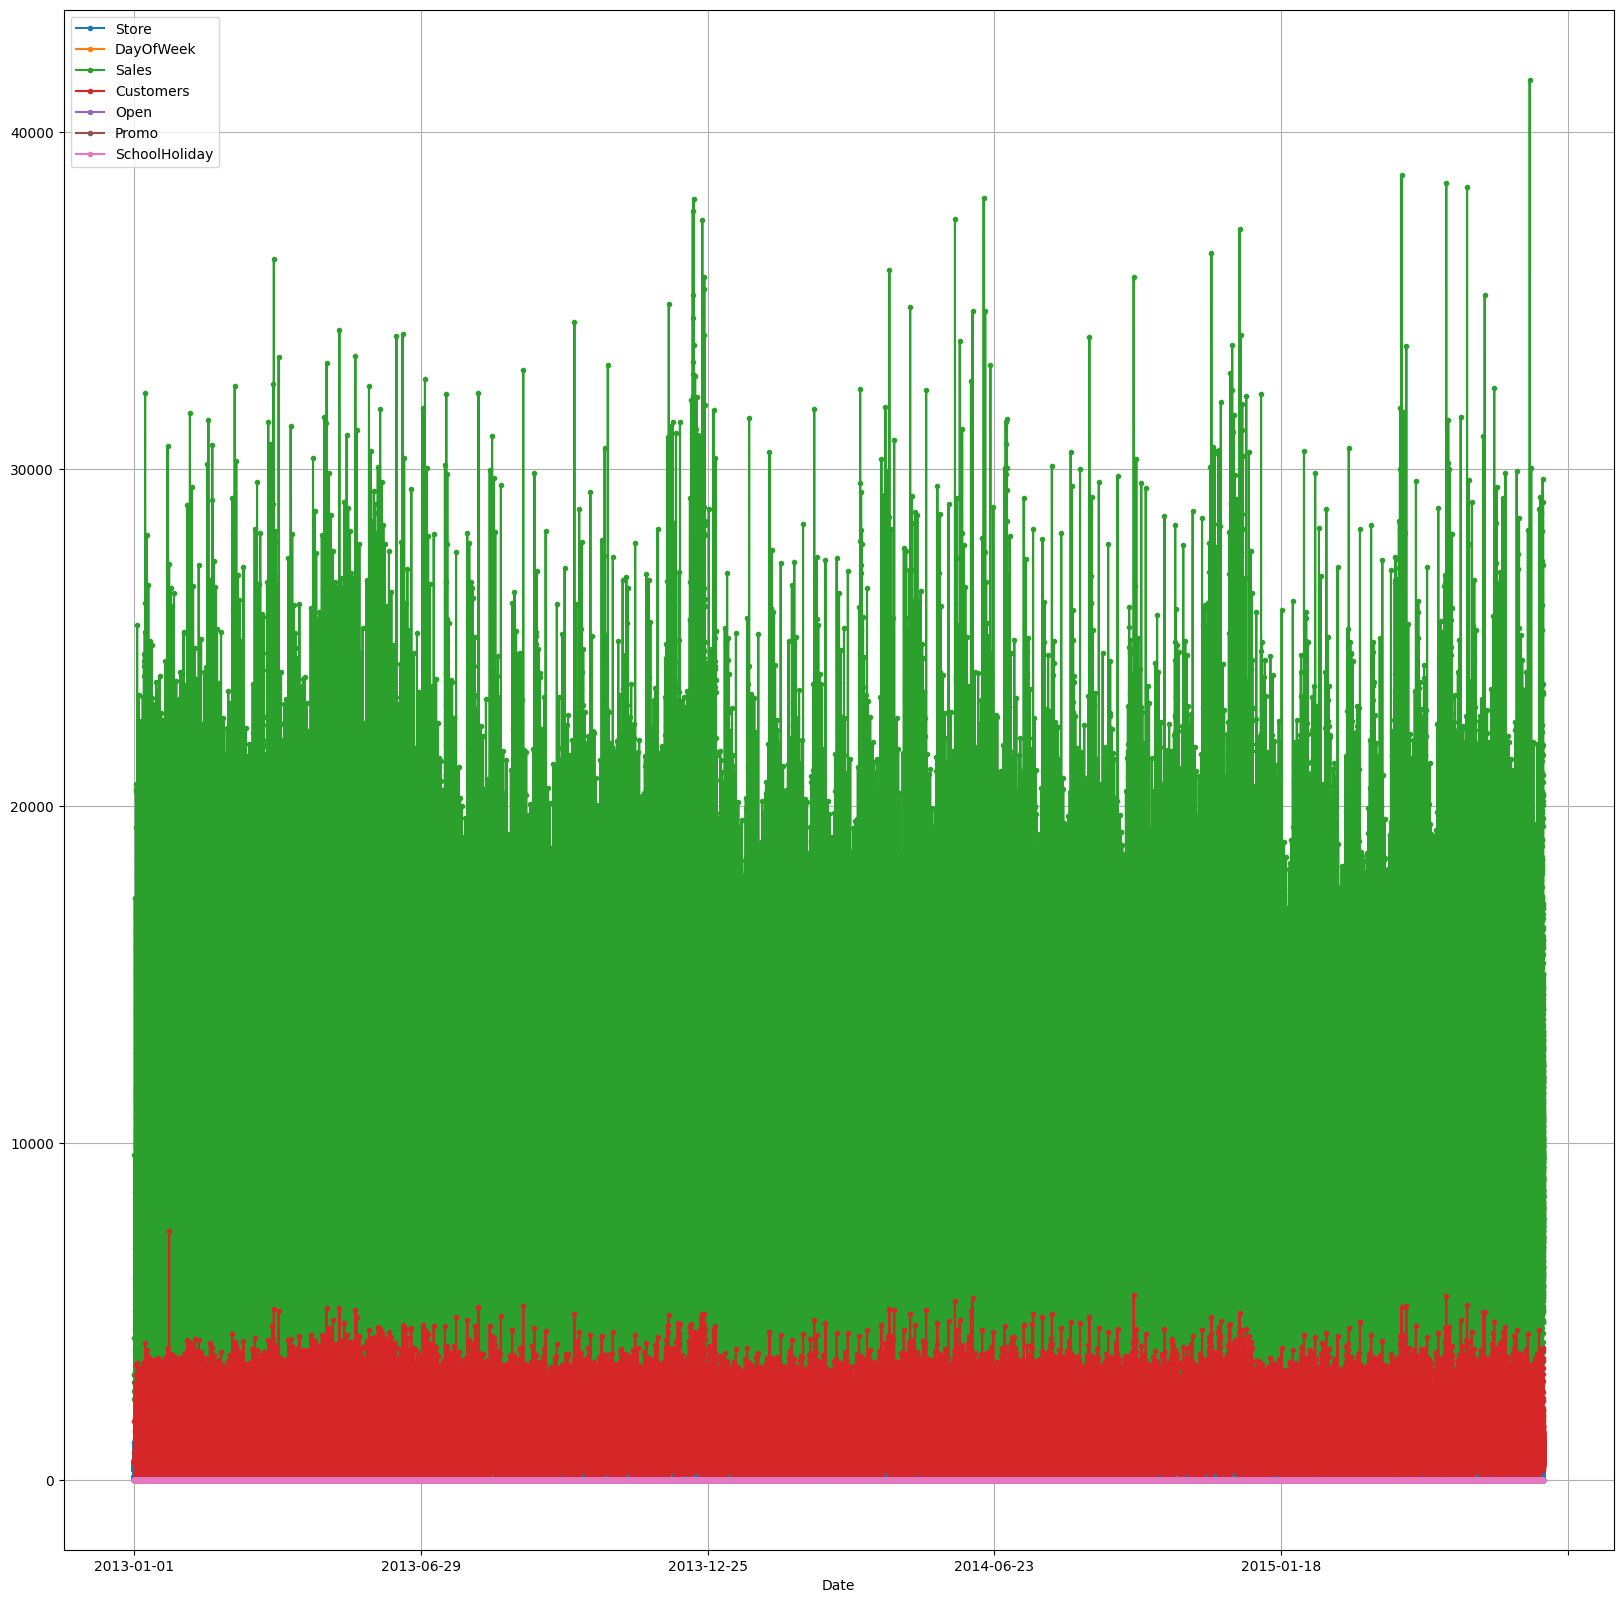

In [10]:
df["2013-01":"2015-07"].plot(grid=True,marker=".",figsize=(20,20))

In [12]:
diff_7=df['Sales'].diff(7)["2013-01":"2015-07"]

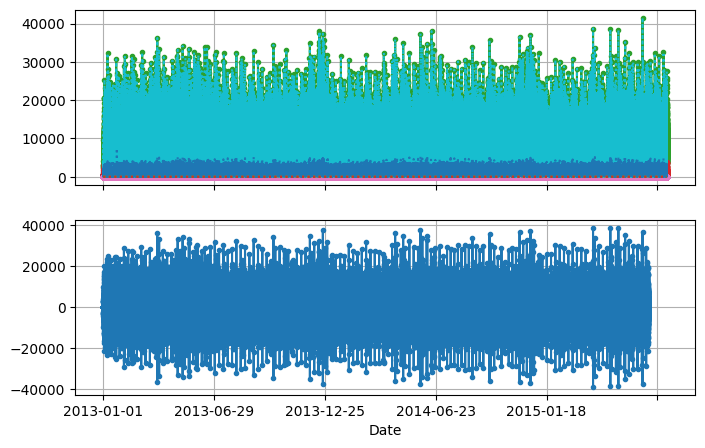

In [13]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5)) 
df.plot(ax=axs[0], legend=False, marker=".") # original time series 
df.shift(7).plot(ax=axs[0], grid=True, legend=False, linestyle=":") # lagged 
diff_7.plot(ax=axs[1], grid=True, marker=".") # 7-day difference time series 
plt.show()

In [13]:
#mean Absloute error naive forcasting
diff_7.abs().mean()

2360.8889286493736

## Applying Arma modeule to make forecasring

In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [20]:
store4=df[df["Store"]==1]

In [22]:
start,end="2013-01-01","2015-07-31"
sales_series=store4.loc[start:end]["Sales"].asfreq("D")
model=ARIMA(sales_series,order=(1,0,0),seasonal_order=(0,1,1,7))

In [23]:
model=model.fit()

In [25]:
Forecasting=model.forecast()

In [26]:
Forecasting

2015-08-01    5127.547381
Freq: D, dtype: float64